In [ ]:
import pandas as pd
import seaborn as sns
import networkx as nx
import numpy as np
import re
import matplotlib.pyplot as plt
import itertools
import sklearn.datasets
from sklearn.metrics.pairwise import euclidean_distances
import math
import random
import Graph_Sampling as gs

In [2]:
def generateRandomGraph(num_nodes, num_edges):
    # Generate a random graph
    G = nx.gnm_random_graph(num_nodes, num_edges)

    # Ensure all nodes have at least degree 1
    for node in G.nodes:
        if G.degree[node] == 0:
            # Find a random node to connect with
            target = random.choice(list(G.nodes))
            while target == node or G.has_edge(node, target):
                target = random.choice(list(G.nodes))
            G.add_edge(node, target)
    return G

In [3]:
randomG = generateRandomGraph(10,15)
randomG.edges

EdgeView([(0, 6), (0, 4), (0, 9), (0, 8), (1, 2), (1, 6), (2, 5), (3, 8), (3, 9), (3, 6), (4, 6), (4, 8), (6, 8), (6, 9), (7, 8)])

In [4]:
def generateProbabilityList(G : nx.Graph):
    probList = []
    for node in G.nodes:
        for _ in range(0, G.degree[node]):
            probList.append(node)
    return probList

# n wanted nodes, m edges for new n
def BAModel(G : nx.Graph, n, m):
    random.seed()
    while len(G.nodes) < n:
        probList = generateProbabilityList(G)
        currentNode = len(G.nodes)
        G.add_node(currentNode) # Add new node with index of len G.nodes
        for i in range(0,m):
            # Need to add check for same edges or multiple edges
            rIndex = random.randint(0,len(probList) - 1)
            while (currentNode, probList[rIndex]) in G.edges: # Generate new nodes to connect to till you find edge that doesnt exist yet
                rIndex = random.randint(0,len(probList) - 1)
            G.add_edge(currentNode, probList[rIndex])
    return G


In [5]:
BAGraph2 = randomG.copy()
BAGraph2 = BAModel(BAGraph2, 5000, 2)

In [6]:
sample_size = len(BAGraph2.nodes) * 0.15
sample_size

750.0

In [7]:
def RandomNodeSampling(G, sample_size):
    sample = nx.Graph()
    newNodes = []
    random.seed()
    rIdx = random.uniform(0, len(G.nodes) - 1)
    while len(sample.nodes) <= sample_size: # Loop till you pick enough nodes
        while list(G.nodes)[rIdx] in newNodes: # Generate new index till you find new node
            rIdx = random.uniform(0, len(G.nodes) - 1)
        newNodes.append(list(G.nodes)[rIdx])
    possibleEdges = []
    for i in newNodes:
        for j in newNodes:
            if (i,j) in list(G.edges) or (j, i) in list(G.edges):
                pass

In [11]:
ffSampling = gs.ForestFire()
sampled_graphFF = ffSampling.forestfire(BAGraph2, sample_size)

In [12]:
sampled_graphFF.edges()

EdgeView([(2373, 1855), (1855, 1033), (1033, 455), (1033, 533), (455, 19), (455, 112), (455, 704), (533, 40), (533, 54), (40, 39), (40, 24), (40, 55), (40, 319), (54, 4), (54, 17), (54, 305), (54, 375), (54, 681), (54, 1004), (54, 1041), (54, 1072), (54, 1622), (54, 1639), (54, 2781), (54, 3141), (54, 3847), (54, 4245), (54, 4499), (54, 4590), (54, 4636), (54, 4858), (54, 4947), (4, 17), (4, 27), (4, 140), (4, 184), (4, 1321), (17, 9), (17, 23), (17, 27), (17, 182), (17, 254), (17, 381), (17, 508), (17, 601), (17, 614), (17, 674), (17, 985), (17, 994), (17, 1021), (17, 1146), (17, 1323), (17, 1473), (17, 1549), (17, 1751), (17, 1839), (17, 2032), (17, 2272), (17, 2366), (17, 2545), (17, 2690), (17, 3168), (17, 3601), (17, 3675), (17, 4129), (17, 4233), (17, 4275), (17, 4303), (17, 4454), (17, 4702), (17, 4720), (305, 246), (305, 648), (305, 767), (305, 774), (375, 121), (1041, 330), (1072, 277), (3141, 2944), (4245, 3574), (4499, 1533), (4636, 0), (19, 6), (19, 8), (19, 41), (19, 72), 

In [14]:
# Pick random initial node
idx = random.randint(0, len(BAGraph2.nodes) - 1)
mhrwSamplig = gs.MHRW()
sampled_graphMHRW = mhrwSamplig.mhrw(BAGraph2, list(BAGraph2.nodes)[idx], sample_size)
sampled_graphMHRW.edges()


EdgeView([(1373, 2324), (4120, 3614), (1281, 208), (4550, 1667), (1667, 924), (924, 4682), (3704, 4807), (3704, 2343), (3704, 1381), (4807, 4900), (794, 3396), (794, 36), (36, 2565), (2565, 966), (1064, 2738), (1272, 1075), (1075, 2760), (2760, 4251), (4251, 4574), (1980, 1157), (1157, 878), (878, 1993), (1993, 2330), (2330, 4188), (4333, 525), (4333, 1005), (1005, 2697), (3253, 3743), (3253, 1562), (3743, 3425), (3425, 3806), (3806, 553), (553, 377), (377, 4328), (4328, 2739), (2739, 366), (366, 113), (113, 4101), (4101, 483), (483, 3431), (3431, 975), (975, 3120), (3120, 845), (845, 4428), (757, 4731), (1493, 3754), (1493, 1491), (2482, 164), (164, 4486), (312, 3623), (1785, 1413), (1785, 2334), (1413, 1368), (1368, 2597), (2597, 963), (291, 968), (968, 2135), (684, 1772), (1772, 4614), (1215, 858), (858, 100), (100, 904), (904, 2607), (2607, 4376), (107, 2221), (2221, 3494), (3494, 2343), (1381, 4713), (4782, 4957), (3391, 3135), (3135, 1152), (1152, 727), (727, 3689), (1400, 650), 

In [15]:
snowballSampling = gs.Snowball()
sampled_graphSnowball = snowballSampling.snowball(BAGraph2, sample_size, 10)
sampled_graphSnowball.edges()

EdgeView([(4865, 529), (4865, 404), (529, 40), (529, 51), (529, 1594), (529, 2072), (529, 2751), (529, 2949), (529, 4621), (529, 4922), (404, 6), (404, 23), (404, 568), (404, 572), (404, 718), (404, 776), (404, 835), (404, 952), (404, 1443), (404, 1860), (4664, 2971), (4664, 2351), (2971, 632), (2971, 839), (2971, 4077), (2351, 385), (2351, 1775), (4868, 1997), (4868, 571), (1997, 806), (1997, 3), (571, 537), (571, 61), (571, 624), (571, 676), (571, 2244), (571, 2943), (571, 3114), (571, 4070), (2689, 333), (2689, 1667), (333, 203), (333, 23), (333, 480), (333, 661), (333, 970), (333, 1078), (333, 1311), (333, 1567), (1667, 48), (1667, 924), (1667, 4550), (4255, 351), (4255, 673), (351, 128), (351, 86), (351, 494), (351, 1560), (351, 4225), (673, 8), (673, 6), (673, 2624), (673, 3673), (673, 3921), (673, 4019), (673, 4761), (2688, 65), (2688, 1696), (2688, 3081), (65, 2), (65, 30), (65, 73), (65, 75), (65, 88), (65, 134), (65, 199), (65, 241), (65, 296), (65, 358), (65, 568), (65, 3049

In [30]:
def getDegreeDistribution(original : nx.Graph, samples : list[nx.Graph]):
    maxDegree = max([degree for node, degree in original.degree])
    distribution = {"degree": [], "original": [], "FF": [], "MHRW": [], "Snowball": []}
    names = ["FF", "MHRW", "Snowball"]
    originalDegrees = [degree for node, degree in original.degree]
    sampleDegrees = [[degree for node, degree in samples[0].degree], [degree for node, degree in samples[1].degree], [degree for node, degree in samples[2].degree]] # Add degrees lists for each sample
    #print(sampleDegrees[0])
    for degree in range(1, maxDegree + 1):
        sampleDegreeCounts = []
        originalDegreeCount = len([i for i in originalDegrees if i >= degree])
        for j in range(0, len(samples)):
            sampleDegreeCounts.append((names[j], len([i for i in sampleDegrees[j] if i >= degree])))
        distribution["degree"].append(degree)
        distribution["original"].append(originalDegreeCount)
        distribution["FF"].append(sampleDegreeCounts[0][1])
        distribution["MHRW"].append(sampleDegreeCounts[1][1])
        distribution["Snowball"].append(sampleDegreeCounts[2][1])
    return distribution

In [31]:
distribution = getDegreeDistribution(BAGraph2, [sampled_graphFF, sampled_graphMHRW, sampled_graphSnowball])

In [47]:
dfDegreeDistribution = pd.DataFrame(distribution)

In [48]:
dfDegreeDistribution.loc[(dfDegreeDistribution["original"] >= 750),"original"] = 750

In [49]:
dfDegreeDistribution = dfDegreeDistribution.drop("degree", axis=1)
dfDegreeDistribution.index += 1

In [50]:
dfDegreeDistribution

,original,FF,MHRW,Snowball
1,750,750,751,755
2,750,273,399,249
3,750,157,2,162
4,750,120,0,127
5,750,88,0,107
...,...,...,...,...
164,1,0,0,0
165,1,0,0,0
166,1,0,0,0
167,1,0,0,0


In [59]:
dfDegreeDistribution.loc[(dfDegreeDistribution["FF"] == 0) & (dfDegreeDistribution["Snowball"] == 0) & (dfDegreeDistribution["original"] < 5)]

,original,FF,MHRW,Snowball
66,4,0,0,0
67,4,0,0,0
68,4,0,0,0
69,4,0,0,0
70,4,0,0,0
...,...,...,...,...
164,1,0,0,0
165,1,0,0,0
166,1,0,0,0
167,1,0,0,0


In [60]:
dfDegreeDistribution.drop(dfDegreeDistribution.loc[(dfDegreeDistribution["FF"] == 0) & (dfDegreeDistribution["Snowball"] == 0) & (dfDegreeDistribution["original"] < 5)].index, inplace=True)
dfDegreeDistribution

,original,FF,MHRW,Snowball
1,750,750,751,755
2,750,273,399,249
3,750,157,2,162
4,750,120,0,127
5,750,88,0,107
...,...,...,...,...
61,6,0,0,0
62,6,0,0,0
63,5,0,0,0
64,5,0,0,0


[]

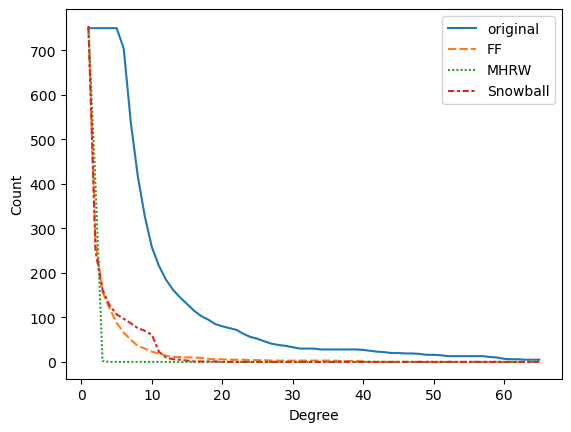

In [61]:
sns.lineplot(data=dfDegreeDistribution)
plt.ylabel("Count")
plt.xlabel("Degree")
plt.plot()